In [91]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report,confusion_matrix,roc_curve, roc_auc_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
import pickle

In [62]:
# load dataset
dataset = pd.read_csv("Phishing_Legitimate_full.csv")
dataset = dataset.drop(columns="id")
dataset

,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,3,1,5,72,0,0,0,0,0,0,...,0,0,1,1,0,1,1,-1,1,1
1,3,1,3,144,0,0,0,0,2,0,...,0,0,0,1,-1,1,1,1,1,1
2,3,1,2,58,0,0,0,0,0,0,...,0,0,0,1,0,-1,1,-1,0,1
3,3,1,6,79,1,0,0,0,0,0,...,0,0,0,1,-1,1,1,1,-1,1
4,3,0,4,46,0,0,0,0,0,0,...,1,0,0,1,1,-1,0,-1,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,3,1,1,50,0,0,0,0,0,0,...,0,0,0,1,1,-1,1,0,1,0
9996,2,1,4,59,1,0,0,0,0,0,...,1,0,0,1,0,0,1,0,1,0
9997,2,1,4,57,0,0,0,0,0,0,...,0,0,0,1,0,1,1,0,1,0
9998,3,1,1,49,0,0,0,0,0,0,...,1,0,0,1,1,0,1,0,1,0


In [63]:
dataset.describe()

,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,...,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2.445100,0.586800,3.300300,70.264100,1.818000,0.138900,0.000300,0.013100,0.32320,0.073800,...,0.339600,0.03220,0.030400,0.956600,0.020200,0.353300,0.793200,0.173400,0.314100,0.500000
std,1.346836,0.751214,1.863241,33.369877,3.106258,0.545744,0.017319,0.113709,1.11466,0.622248,...,0.473597,0.17654,0.171694,0.248037,0.820036,0.888908,0.521019,0.755771,0.897843,0.500025
min,1.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.00000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,2.000000,0.000000,2.000000,48.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.00000,0.000000,1.000000,-1.000000,-1.000000,1.000000,0.000000,-1.000000,0.000000
50%,2.000000,1.000000,3.000000,62.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.500000
75%,3.000000,1.000000,4.000000,84.000000,2.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,1.000000,0.00000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,21.000000,14.000000,18.000000,253.000000,55.000000,9.000000,1.000000,1.000000,18.00000,19.000000,...,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Feature Engineering**

In [64]:
#feature selection
correlation_coefficients = dataset.corr()['CLASS_LABEL'].abs().sort_values(ascending=False)
print(correlation_coefficients)
top_10_features = correlation_coefficients[1:11].index.tolist()
top_10_features

CLASS_LABEL                           1.000000
PctExtNullSelfRedirectHyperlinksRT    0.540545
FrequentDomainNameMismatch            0.463956
NumDash                               0.372235
SubmitInfoToEmail                     0.357635
PctNullSelfRedirectHyperlinks         0.342806
InsecureForms                         0.316380
NumDots                               0.294111
PctExtHyperlinks                      0.259728
NumSensitiveWords                     0.255208
IframeOrFrame                         0.235233
PathLevel                             0.229450
AbnormalExtFormActionR                0.185799
UrlLengthRT                           0.169513
HostnameLength                        0.169157
NumDashInHostname                     0.150444
NumQueryComponents                    0.147391
AbnormalFormAction                    0.145073
EmbeddedBrandName                     0.141790
IpAddress                             0.132291
DomainInPaths                         0.118201
MissingTitle 

['PctExtNullSelfRedirectHyperlinksRT',
 'FrequentDomainNameMismatch',
 'NumDash',
 'SubmitInfoToEmail',
 'PctNullSelfRedirectHyperlinks',
 'InsecureForms',
 'NumDots',
 'PctExtHyperlinks',
 'NumSensitiveWords',
 'IframeOrFrame']

In [65]:
X = dataset[dataset.columns.intersection(top_10_features)]
y = dataset['CLASS_LABEL']
X

,NumDots,NumDash,NumSensitiveWords,PctExtHyperlinks,InsecureForms,PctNullSelfRedirectHyperlinks,FrequentDomainNameMismatch,SubmitInfoToEmail,IframeOrFrame,PctExtNullSelfRedirectHyperlinksRT
0,3,0,0,0.000000,1,0.000000,0,0,0,1
1,3,0,1,0.000000,1,0.000000,0,0,0,1
2,3,0,0,0.375000,1,0.000000,0,0,0,0
3,3,1,0,1.000000,1,0.000000,1,1,0,-1
4,3,0,0,1.000000,0,0.000000,1,0,1,-1
...,...,...,...,...,...,...,...,...,...,...
9995,3,0,0,0.096774,1,0.000000,0,0,0,1
9996,2,1,0,0.161290,1,0.129032,0,0,1,1
9997,2,0,0,0.070423,1,0.056338,0,0,0,1
9998,3,0,0,0.166667,1,0.000000,0,0,1,1


**Normalizing Data**

In [66]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

**Test-Train Split**

In [67]:
tf.random.set_seed(7)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

**Model Creation**

In [68]:
model = keras.Sequential()
model.add(keras.layers.InputLayer(input_shape=(10,)))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [69]:
model.fit(X_train, y_train, epochs=50, batch_size=128, validation_split=0.2)

Epoch 1/50
44/44 [==============================] - 5s 20ms/step - loss: 0.5053 - accuracy: 0.7904 - val_loss: 0.3457 - val_accuracy: 0.8650
Epoch 2/50
44/44 [==============================] - 0s 7ms/step - loss: 0.2851 - accuracy: 0.8712 - val_loss: 0.2815 - val_accuracy: 0.8464
Epoch 3/50
44/44 [==============================] - 0s 8ms/step - loss: 0.2418 - accuracy: 0.9029 - val_loss: 0.2490 - val_accuracy: 0.8964
Epoch 4/50
44/44 [==============================] - 0s 8ms/step - loss: 0.2180 - accuracy: 0.9212 - val_loss: 0.2304 - val_accuracy: 0.9064
Epoch 5/50
44/44 [==============================] - 0s 7ms/step - loss: 0.2032 - accuracy: 0.9284 - val_loss: 0.2322 - val_accuracy: 0.9000
Epoch 6/50
44/44 [==============================] - 0s 11ms/step - loss: 0.1944 - accuracy: 0.9277 - val_loss: 0.2078 - val_accuracy: 0.9286
Epoch 7/50
44/44 [==============================] - 0s 8ms/step - loss: 0.1904 - accuracy: 0.9286 - val_loss: 0.2111 - val_accuracy: 0.9150
Epoch 8/50
44/44 [

**Evaluating Model**

In [70]:
train_loss, train_acc = model.evaluate(X_train, y_train)
print('Train accuracy:', train_acc)
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

219/219 [==============================] - 0s 2ms/step - loss: 0.1104 - accuracy: 0.9636
Train accuracy: 0.9635714292526245
94/94 [==============================] - 0s 2ms/step - loss: 0.1426 - accuracy: 0.9520
Test accuracy: 0.9520000219345093


94/94 [==============================] - 0s 2ms/step


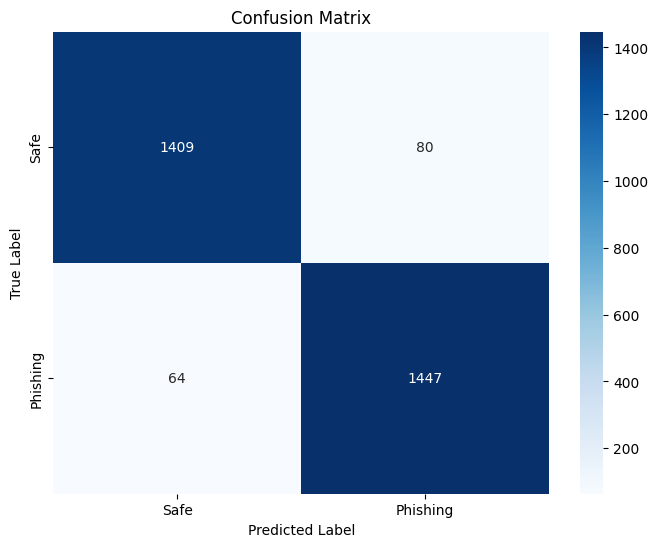

In [96]:
y_pred_proba = model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Safe', 'Phishing'], yticklabels=['Safe', 'Phishing'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [93]:
model_filename = 'phishing_url_detection_fnn_model.pkl'
with open(model_filename, 'wb') as model_file:
    pickle.dump(model, model_file)

**Logistic Regression**

In [94]:
from sklearn.linear_model import LogisticRegression

logistic_regression_model = LogisticRegression(max_iter=100, penalty='l2', C=1.0)

history = logistic_regression_model.fit(X_train, y_train)

In [95]:
y_pred_train = logistic_regression_model.predict(X_train)

print("Accuracy on Test:", accuracy_score(y_train, y_pred_train))
print("Classification Report:\n", classification_report(y_train, y_pred_train))

y_pred_test = logistic_regression_model.predict(X_test)

print("Accuracy on Test:", accuracy_score(y_test, y_pred_test))
print("Classification Report:\n", classification_report(y_test, y_pred_test))

Accuracy on Test: 0.8971428571428571
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.88      0.90      3511
           1       0.88      0.92      0.90      3489

    accuracy                           0.90      7000
   macro avg       0.90      0.90      0.90      7000
weighted avg       0.90      0.90      0.90      7000

Accuracy on Test: 0.8963333333333333
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.88      0.89      1489
           1       0.89      0.91      0.90      1511

    accuracy                           0.90      3000
   macro avg       0.90      0.90      0.90      3000
weighted avg       0.90      0.90      0.90      3000



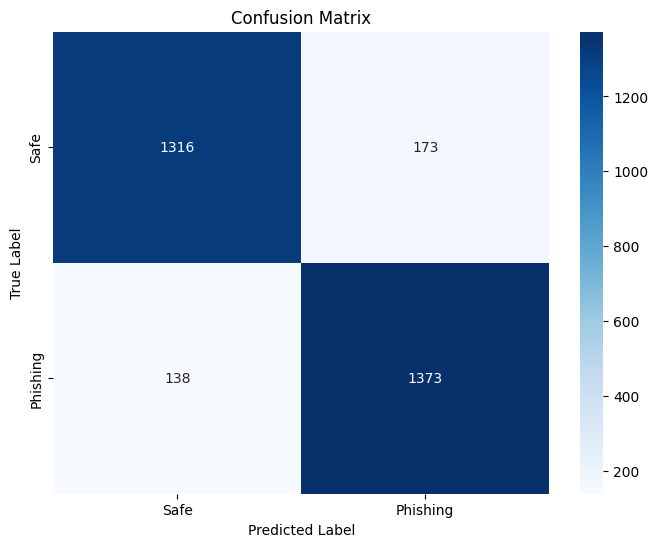

In [97]:
cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Safe', 'Phishing'], yticklabels=['Safe', 'Phishing'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [98]:
model_filename = 'phishing_url_detection_logistic_regression.pkl'
with open(model_filename, 'wb') as model_file:
    pickle.dump(logistic_regression_model, model_file)

**Random Forests**

In [99]:
from sklearn.ensemble import RandomForestClassifier

random_forest_model = RandomForestClassifier(n_estimators=15)
history2 = random_forest_model.fit(X_train, y_train)

In [100]:
y_pred_train = random_forest_model.predict(X_train)

print("Accuracy on Test:", accuracy_score(y_train, y_pred_train))
print("Classification Report:\n", classification_report(y_train, y_pred_train))

y_pred_test = random_forest_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_test))
print("Classification Report:\n", classification_report(y_test, y_pred_test))

Accuracy on Test: 0.9872857142857143
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      3511
           1       0.98      0.99      0.99      3489

    accuracy                           0.99      7000
   macro avg       0.99      0.99      0.99      7000
weighted avg       0.99      0.99      0.99      7000

Accuracy: 0.9606666666666667
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.95      0.96      1489
           1       0.95      0.97      0.96      1511

    accuracy                           0.96      3000
   macro avg       0.96      0.96      0.96      3000
weighted avg       0.96      0.96      0.96      3000



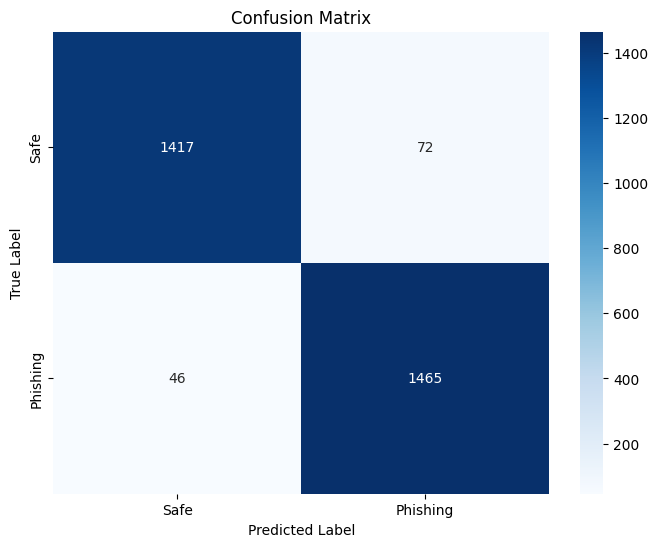

In [101]:
cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Safe', 'Phishing'], yticklabels=['Safe', 'Phishing'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [106]:
model_filename = 'phishing_url_detection_random_forest.pkl'
with open(model_filename, 'wb') as model_file:
    pickle.dump(random_forest_model, model_file)

**Naive Bayes**

In [102]:
from sklearn.naive_bayes import GaussianNB

naive_bayes_model = GaussianNB()
history3 = naive_bayes_model.fit(X_train, y_train)

In [104]:
y_pred_train = naive_bayes_model.predict(X_train)

print("Accuracy on Test:", accuracy_score(y_train, y_pred_train))
print("Classification Report:\n", classification_report(y_train, y_pred_train))

y_pred_test = naive_bayes_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_test))
print("Classification Report:\n", classification_report(y_test, y_pred_test))

Accuracy on Test: 0.8264285714285714
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.94      0.84      3511
           1       0.92      0.71      0.80      3489

    accuracy                           0.83      7000
   macro avg       0.84      0.83      0.82      7000
weighted avg       0.84      0.83      0.82      7000

Accuracy: 0.8266666666666667
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.94      0.84      1489
           1       0.92      0.71      0.81      1511

    accuracy                           0.83      3000
   macro avg       0.84      0.83      0.82      3000
weighted avg       0.85      0.83      0.82      3000



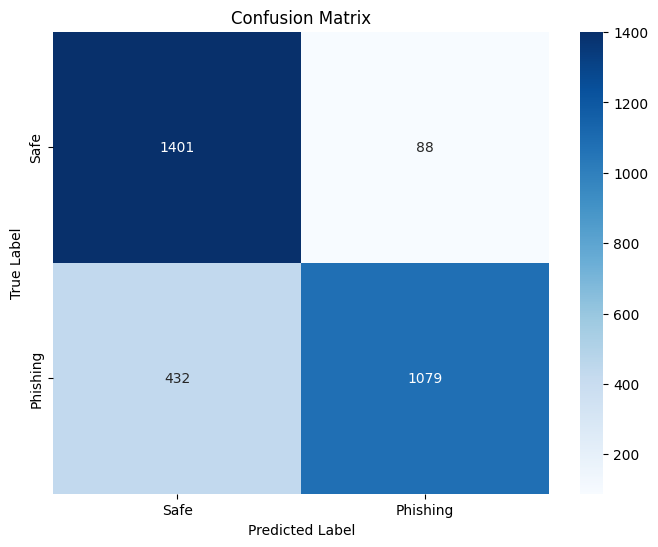

In [105]:
cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Safe', 'Phishing'], yticklabels=['Safe', 'Phishing'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [107]:
model_filename = 'phishing_url_detection_naive_bayes.pkl'
with open(model_filename, 'wb') as model_file:
    pickle.dump(naive_bayes_model, model_file)